In [64]:
#Dependencies
import math
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [65]:
#Load the data
df = pd.read_csv("data/ETH-USD_2017_2022.csv", encoding = 'utf-8')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [66]:
# Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [67]:
projection = 5

In [68]:
# Create a new column
df[str(projection)+'_Day_Price_Forecast'] = df[['Close']].shift(-projection)

# Show data
df[['Close', str(projection)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2017-11-09,320.884003,337.631012
2017-11-10,299.252991,333.356995
2017-11-11,314.681000,330.924011
2017-11-12,307.907990,332.394012
2017-11-13,316.716003,347.612000
...,...,...
2022-05-07,2636.093018,NaN
2022-05-08,2517.459961,NaN
2022-05-09,2245.430420,NaN
2022-05-10,2343.510986,NaN


In [69]:
# Creation of the independent dataset X
X = np.array(df[['Close']])

# Remove the last 'projection' rows
X = X[:df.shape[0] - projection]

print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [2940.644775]
 [2749.213135]
 [2694.979736]]


In [70]:
# Creation of the dependent dataset y
y = np.array(df[str(projection)+'_Day_Price_Forecast'])

# Remove the last 'projection' rows
y = y[:-projection]

print(y)

[ 337.631012  333.356995  330.924011 ... 2245.43042  2343.510986
 2362.600586]


In [71]:
# Split the data : 80% training - 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [72]:
# Creation and training of the model
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [73]:
# Test the accuracy
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.979802997294866


In [74]:
# Give the prediction dataset
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2589.05424903  139.30492675  730.71960946 2703.34756206  185.34812595
  674.90404274 1117.06617351  478.43263969  704.29290507 2183.1792813
  181.89837273  871.10067419 2325.81306523  170.07393996  972.1318803
  116.28829333  212.39496293 3175.05930729  454.67557584 2788.19543654
  265.15465219 3040.82146367  461.09562289  405.08694345 1835.88444847
 1804.37063803  296.8226435   436.47958634  291.22266288 2889.54815165
  739.99674745  173.86972359  211.96420894  470.47374311  135.73112528
  179.98805641  189.06700097  382.08688742  175.29424596  367.48575638
  993.32058696 1055.67529354 2932.67173936  298.08965453  381.17182859
  475.81963491  202.52690184  154.06133746  231.82048347  589.69278285
  237.33949365  413.42493982 3961.66311668 3182.8133254   190.93002948
  358.72949449 2604.30482028  179.52489189 3177.91626924  268.50028741
  184.08647262  474.91073606 1837.97792258  764.39916535  311.96441805
 4151.89008779 2737.58767254  687.47989618  143.23711187 1012.73345622
  596.86

In [75]:
print(y_test)

[2603.466553  133.593567  708.870972 2372.484375  200.677124  816.119995
 1262.246704  518.890991  552.778992 2344.89502   176.013504  816.950989
 2736.488525  196.846283 1148.530029  119.430885  209.968994 3270.60083
  474.011993 2590.359619  226.753387 3248.288574  455.179993  396.358185
 1937.449219 1746.616821  287.547119  461.00528   281.944    2857.4104
  884.44397   180.71051   175.177002  479.372986  141.258133  181.18634
  210.119995  398.526001  167.838516  379.484039 1299.73999   986.229004
 2763.701172  336.753174  370.285004  427.52301   220.675125  150.803116
  185.065994  659.297913  274.689056  386.730103 4093.281006 3164.025146
  169.516739  286.494995 2724.619873  164.513351 3790.98999   225.680267
  186.355194  446.518005 1593.413452  772.640991  227.578064 4217.876953
 2590.263184  730.367554  155.304153 1255.819946  597.562012  149.554337
  188.617538  345.554657 1366.77002  3062.310303 3172.456299  642.868958
  332.394012  165.955353  180.521179 1182.359985  212.2

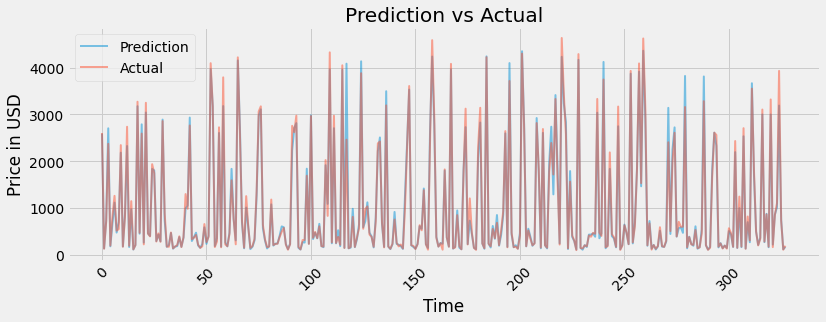

In [76]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.5)
plt.plot(y_test, label='Actual', lw=2, alpha=.5)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [77]:
# Creation of a variable called x_projection and set it equal to the last 'projection' rows of data from the original dataset
x_projection = np.array(df[['Close']])[-projection:]
print(x_projection)

[[2636.093018]
 [2517.459961]
 [2245.43042 ]
 [2343.510986]
 [2362.600586]]


In [78]:
# Print the model predictions for the 'projection'
projection_prediction = svr_rbf.predict(x_projection)
print(projection_prediction)

[2716.19809593 2660.500782   2263.73978275 2401.08559782 2433.98970244]
